# GRAPHs
### Evaluation
```bash
python eval_qa.py --dir <path_to_saved_checkpoints>

- For LLMs based on non-parametric memory, the cached evaluation scripts and results are included in ```LLM.ipynb```.

**eval_qa.py:** This script is listed as an evaluation script for the trained model. Since the graphs show accuracy across optimization steps, the plotting logic could be part of this evaluation script. Look here for matplotlib or seaborn code that might generate accuracy plots.

In [1]:
import sys
import matplotlib.pyplot as plt
from eval_qa import eval_file
import argparse
import pandas as pd
import torch
import json
torch.cuda.empty_cache()

## Accuracy Graphs

Insert path where the model is saved (= outputfile) 

Will insert 2 path for comparing 2 models at a time!

**/scratch/davide/model_paper**  new directory scratch!


***Path modelli seri == 4 gpu , all dataset***
-path where saftenesors checkpoints are saved -

In [6]:
path_input_0 ="/scratch/davide/model_paper/outputs_2000_200_12_6/" # on  complete dataset long training (4days)

#path_input_1 =  "/scratch/davide/model_paper/outputs_data_real_test_0_4gpu/"  # on  complete dataset  (small training)

path_input_1  = "/scratch/davide/model_paper/outputs_small_4gpu/"

path prove varie:


In [24]:

#path_input_0 = "/home/s220331/GROK/Thesis/outputs_ex_0/"
path_input_0 ="/scratch/davide/model_paper/outputs_2000_200_12_6/" # on  complete dataset long training (4days)



path_input_1  = "/scratch/davide/model_paper/outputs_small_4gpu/"   # 4 gpu small dataset


path_es ="/scratch/davide/model_paper/outputs_small_4gpu_IID_VALID/"   # here we substitute the valid.json with (valid_iid.json)
path_es_1= "/scratch/davide/model_paper/outputs_small_4gpu/"       # 



#path_input_1 = "/scratch/davide/model_paper/outputs_multy/" #first model multy on ex_small dataset



# esempio new analyssi 8sbatch)
#path_es = "/scratch/davide/model_paper/outputs_sbatch_test_0/"

#path_es ="/scratch/davide/model_paper/outputs_prova_checkpoint_2/"

In [25]:
"""# Just to check if the one and multy gpu file works the same 
multy= "/scratch/davide/model_paper/outputs_multy/checkpoint-1000/all_items.json"
one= "/home/s220331/GROK/Thesis/outputs_ex_0/checkpoint-1000/all_items.json"

with open(multy, "r") as read_file:
    multy_d = json.load(read_file)

with open(one , "r") as read_file:
    one_d = json.load(read_file)

print("all_items_json len multy gpu :",len(multy_d), "\n")
print("all_items_json len multy gpu :",len(one_d))"""

'# Just to check if the one and multy gpu file works the same \nmulty= "/scratch/davide/model_paper/outputs_multy/checkpoint-1000/all_items.json"\none= "/home/s220331/GROK/Thesis/outputs_ex_0/checkpoint-1000/all_items.json"\n\nwith open(multy, "r") as read_file:\n    multy_d = json.load(read_file)\n\nwith open(one , "r") as read_file:\n    one_d = json.load(read_file)\n\nprint("all_items_json len multy gpu :",len(multy_d), "\n")\nprint("all_items_json len multy gpu :",len(one_d))'

**Model 0:**

In [26]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_input_0, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_0 = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_0:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    print(folder_name, "|", res)
    continue

100%|██████████| 51/51 [00:01<00:00, 33.87it/s]

checkpoint-2000 | id_atomic: 0.01; ood_atomic: 0.001; train_inferred: 0.013; test_inferred_iid: 0.009; test_inferred_ood: 0.0
checkpoint-4000 | id_atomic: 0.01; ood_atomic: 0.001; train_inferred: 0.013; test_inferred_iid: 0.011; test_inferred_ood: 0.0
checkpoint-6000 | id_atomic: 0.042; ood_atomic: 0.001; train_inferred: 0.037; test_inferred_iid: 0.009; test_inferred_ood: 0.0
checkpoint-8000 | id_atomic: 0.381; ood_atomic: 0.004; train_inferred: 0.196; test_inferred_iid: 0.018; test_inferred_ood: 0.0
checkpoint-10000 | id_atomic: 0.909; ood_atomic: 0.018; train_inferred: 0.59; test_inferred_iid: 0.076; test_inferred_ood: 0.001
checkpoint-12000 | id_atomic: 0.997; ood_atomic: 0.108; train_inferred: 0.925; test_inferred_iid: 0.286; test_inferred_ood: 0.0
checkpoint-14000 | id_atomic: 1.0; ood_atomic: 0.606; train_inferred: 0.992; test_inferred_iid: 0.546; test_inferred_ood: 0.0
checkpoint-16000 | id_atomic: 0.999; ood_atomic: 0.93; train_inferred: 0.999; test_inferred_iid: 0.716; test_in

**Model 1:**

In [46]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_input_1, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_1 = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_1:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    print(folder_name, "|", res)
    #continue

100%|██████████| 13/13 [00:00<00:00, 310.61it/s]

checkpoint-2000 | id_atomic: 0.02; ood_atomic: 0.005; train_inferred: 0.03; test_inferred_iid: 0.027; test_inferred_ood: 0.0
checkpoint-4000 | id_atomic: 0.087; ood_atomic: 0.005; train_inferred: 0.06; test_inferred_iid: 0.033; test_inferred_ood: 0.004
checkpoint-5000 | id_atomic: 0.113; ood_atomic: 0.02; train_inferred: 0.07; test_inferred_iid: 0.013; test_inferred_ood: 0.0
checkpoint-10000 | id_atomic: 0.99; ood_atomic: 0.19; train_inferred: 0.97; test_inferred_iid: 0.927; test_inferred_ood: 0.008
checkpoint-15000 | id_atomic: 0.997; ood_atomic: 0.86; train_inferred: 1.0; test_inferred_iid: 0.983; test_inferred_ood: 0.0
checkpoint-20000 | id_atomic: 0.997; ood_atomic: 0.865; train_inferred: 0.997; test_inferred_iid: 1.0; test_inferred_ood: 0.0
checkpoint-25000 | id_atomic: 1.0; ood_atomic: 0.89; train_inferred: 1.0; test_inferred_iid: 0.997; test_inferred_ood: 0.004
checkpoint-30000 | id_atomic: 1.0; ood_atomic: 0.93; train_inferred: 1.0; test_inferred_iid: 0.987; test_inferred_ood: 

test

In [28]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_es, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_test = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_test:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    print(folder_name, "|", res)
    continue

100%|██████████| 23/23 [00:00<00:00, 280.24it/s]

checkpoint-500 | id_atomic: 0.01; ood_atomic: 0.0; train_inferred: 0.023; test_inferred_iid: 0.017; test_inferred_ood: 0.0
checkpoint-1000 | id_atomic: 0.007; ood_atomic: 0.0; train_inferred: 0.013; test_inferred_iid: 0.013; test_inferred_ood: 0.0
checkpoint-1500 | id_atomic: 0.02; ood_atomic: 0.015; train_inferred: 0.027; test_inferred_iid: 0.02; test_inferred_ood: 0.0
checkpoint-2000 | id_atomic: 0.013; ood_atomic: 0.0; train_inferred: 0.027; test_inferred_iid: 0.02; test_inferred_ood: 0.0
checkpoint-2500 | id_atomic: 0.017; ood_atomic: 0.005; train_inferred: 0.02; test_inferred_iid: 0.007; test_inferred_ood: 0.0
checkpoint-3000 | id_atomic: 0.05; ood_atomic: 0.01; train_inferred: 0.027; test_inferred_iid: 0.01; test_inferred_ood: 0.004
checkpoint-3500 | id_atomic: 0.047; ood_atomic: 0.01; train_inferred: 0.027; test_inferred_iid: 0.017; test_inferred_ood: 0.004
checkpoint-4000 | id_atomic: 0.07; ood_atomic: 0.0; train_inferred: 0.057; test_inferred_iid: 0.03; test_inferred_ood: 0.0


In [29]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_es_1, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_test_1 = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_test_1:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    print(folder_name, "|", res)
    continue

100%|██████████| 13/13 [00:00<00:00, 371.62it/s]

checkpoint-2000 | id_atomic: 0.02; ood_atomic: 0.005; train_inferred: 0.03; test_inferred_iid: 0.027; test_inferred_ood: 0.0
checkpoint-4000 | id_atomic: 0.087; ood_atomic: 0.005; train_inferred: 0.06; test_inferred_iid: 0.033; test_inferred_ood: 0.004
checkpoint-5000 | id_atomic: 0.113; ood_atomic: 0.02; train_inferred: 0.07; test_inferred_iid: 0.013; test_inferred_ood: 0.0
checkpoint-10000 | id_atomic: 0.99; ood_atomic: 0.19; train_inferred: 0.97; test_inferred_iid: 0.927; test_inferred_ood: 0.008
checkpoint-15000 | id_atomic: 0.997; ood_atomic: 0.86; train_inferred: 1.0; test_inferred_iid: 0.983; test_inferred_ood: 0.0
checkpoint-20000 | id_atomic: 0.997; ood_atomic: 0.865; train_inferred: 0.997; test_inferred_iid: 1.0; test_inferred_ood: 0.0
checkpoint-25000 | id_atomic: 1.0; ood_atomic: 0.89; train_inferred: 1.0; test_inferred_iid: 0.997; test_inferred_ood: 0.004
checkpoint-30000 | id_atomic: 1.0; ood_atomic: 0.93; train_inferred: 1.0; test_inferred_iid: 0.987; test_inferred_ood: 

Create the Accuarcy Graphs:

In [ ]:

def dic_score(dir__, check = False, fn = 'all_items.json',file_name = 'Accuracy_Loss.ipynb'):

    #sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_es_1_SH, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only
    sys.argv = [file_name , '--dir', dir__, '--fn', fn]

    #this is used to run the script from command line
    parser = argparse.ArgumentParser()
    parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
    parser.add_argument("--fn", default='all_items.json', type=str, help="")
    parser.add_argument("--partition_atomic", action="store_true", help="")
    args = parser.parse_args()
    args.dir, args.fn, args.partition_atomic

    scores_dict = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

    if check:
        temp = []
        # temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
        for (folder_name, val) in scores_dict_normal_test_1_SH:
            temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

        for (folder_name, res) in temp:
            print(folder_name, "|", res)
            #continue

    return scores_dict

SyntaxError: invalid syntax (4001238753.py, line 1)

In [49]:
# Data loaded from the previous step

def Acc_graph(data = scores_dict_normal_0, data_sharing = scores_dict_normal_1, title_1= 'Model Accuracy over Optimization Steps (Normal)',title_2= 'Model Accuracy over Optimization Steps (Sharing)', compare_scale=False ):
    
    optimization_steps = [int(checkpoint.split('-')[1]) for checkpoint, _ in data]
    train_id = [dict(results)['train_inferred'] for _, results in data]   #inferred train-> iid as no train on ood obviously!
    test_id = [dict(results)['test_inferred_iid'] for _, results in data]
    test_ood = [dict(results)['test_inferred_ood'] for _, results in data]

    # Sample Data (replace these with your actual data)

    # Create the figure and axis objects
   
    fig, axs = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
    # title figure
    fig.suptitle('Accuracy Composition', fontsize=13, fontweight='bold' )


    if compare_scale:
        axs[1].set_xlabel('Optimization Step ')
        #axs[1].set_xscale('log')
        axs[0].set_xscale('log')  # Set X-axis to log scale
        axs[0].set_xlabel('Optimization Step (Log Scale)')
    else:
        axs[0].set_xscale('log')  # Set X-axis to log scale
        axs[0].set_xlabel('Optimization Step (Log Scale)')
        axs[1].set_xlabel('Optimization Step (Log Scale)')
        axs[1].set_xscale('log')  # Set X-axis to log scale

    # First graph
    axs[0].plot(optimization_steps, train_id, 'o-', label='Train (ID)', color='r')
    axs[0].plot(optimization_steps, test_id, 's-', label='Test (ID)', color='g')
    axs[0].plot(optimization_steps, test_ood, '^-', label='Test (OOD)', color='b')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()
    axs[0].grid(True)  # Enable grid lines for the first graph
    # title
    axs[0].set_title(title_1, fontsize=13)

    # Second graph (adjusting accuracy curves for the second graph)
    optimization_steps = [int(checkpoint.split('-')[1]) for checkpoint, _ in data_sharing]
    train_id = [dict(results)['train_inferred'] for _, results in data_sharing]
    test_id = [dict(results)['test_inferred_iid'] for _, results in data_sharing]
    test_ood = [dict(results)['test_inferred_ood'] for _, results in data_sharing]

    # title
    axs[1].set_title(title_2, fontsize=13)

    axs[1].plot(optimization_steps, train_id, 'o-', label='Train (ID)', color='r')
    axs[1].plot(optimization_steps, test_id, 's-', label='Test (ID)', color='g')
    axs[1].plot(optimization_steps, test_ood, '^-', label='Test (OOD)', color='b')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid(True)  # Enable grid lines for the first graph

    plt.tight_layout()
    plt.show()


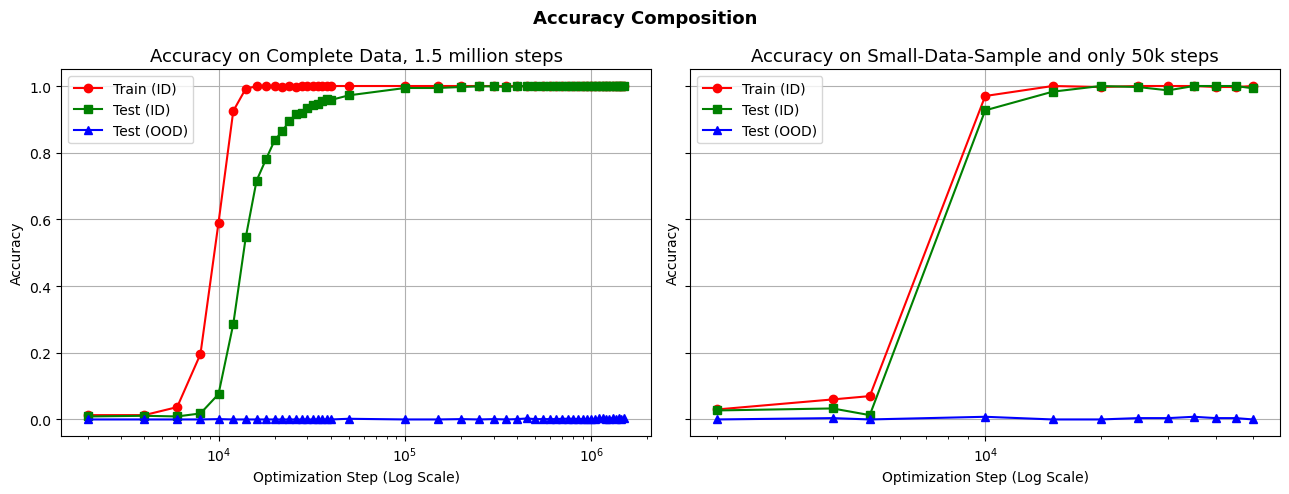

In [31]:
Acc_graph(title_1 = 'Accuracy on Complete Data, 1.5 million steps'  , title_2 = "Accuracy on Small-Data-Sample and only 50k steps")

It could be seen that a bigger dataset just delay the train and test accuracy on later steps. The vocabulary complete =52000 the small is... (check)

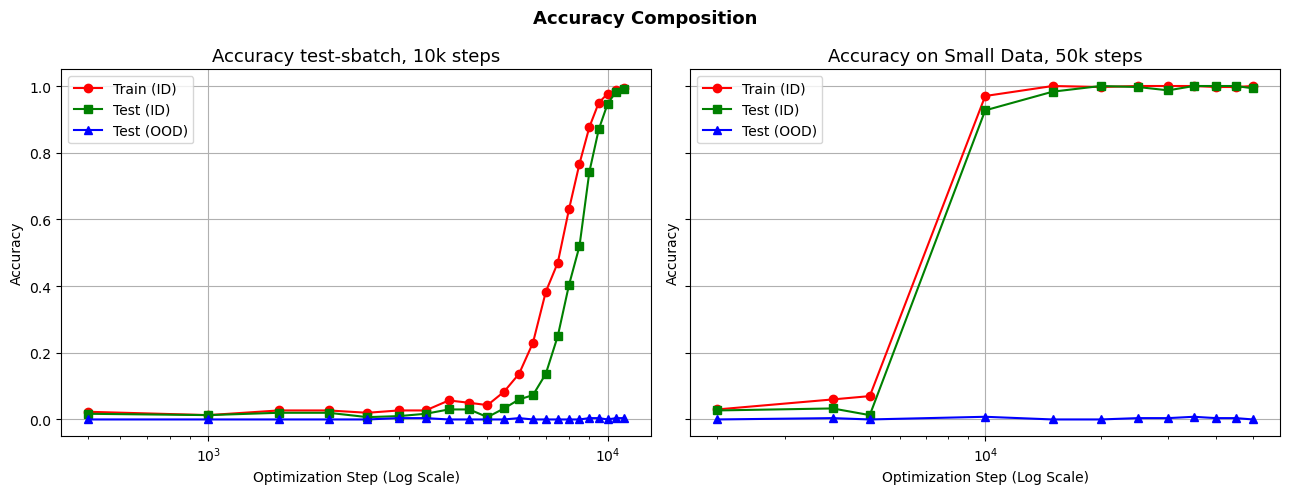

In [32]:
Acc_graph(scores_dict_normal_test , title_1 = 'Accuracy test-sbatch, 10k steps'  , title_2 = "Accuracy on Small Data, 50k steps")

## Loss graphs

**Compare the Loss of 2 models**

Insert 2 paths to the csv inside the output files

***Remember** in the csv file this values are printed as default:
>eval_loss 

>train_loss 

as well as the **global_step** and **epoch** needed as time reference


In [33]:
#path_csv_0 = "/home/s220331/GROK/Thesis/outputs_ex_0/training_progress_scores.csv"
path_csv_0 = path_input_0 + "training_progress_scores.csv" 

#path_csv_1= "/scratch/davide/model_paper/outputs_multy/training_progress_scores.csv"
path_csv_1= path_input_1 +"training_progress_scores.csv"

path_es_csv = path_es+"training_progress_scores.csv"
path_es_csv_2 = path_es_1 +"training_progress_scores.csv"

In [34]:
data_es= pd.read_csv(path_es_csv)
data_es_2= pd.read_csv(path_es_csv_2)
df= data_es_2
# Update `epoch` column values from -999 to -1
df['epoch'] = df['epoch'].replace(-999, -1)

# Update `train_loss` column values from -99.0 to -1.0
df['train_loss'] = df['train_loss'].replace(-99.0, -1.0)

#data_es_2
#df

Visually inspect the files if needed usifn pd Dataframe:

In [35]:

data_0 = pd.read_csv(path_csv_0)
data_0
data_1 = pd.read_csv(path_csv_1)
data_0




,global_step,epoch,eval_loss,train_loss
0,1014,1,-1.000000,4.330196
1,2000,-1,4.019503,-1.000000
2,2028,2,-1.000000,3.313667
3,3042,3,-1.000000,2.934513
4,4000,-1,4.344821,-1.000000
...,...,...,...,...
1525,1497678,1477,-1.000000,0.001250
1526,1498692,1478,-1.000000,0.001269
1527,1499706,1479,-1.000000,0.001161
1528,1500000,-1,7.550612,-1.000000


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def Loss_graph_1(data_0= data_0, data_1 = data_1, title_1="Model Loss over Optimization Steps (Normal)", title_2="Model Loss over Optimization Steps (Sharing)", compare_scale=False):
    """
    Plots two graphs side by side for model loss over optimization steps.
    
    Parameters:
    - data_0: DataFrame containing 'global_step', 'train_loss', and 'eval_loss' columns for the first dataset
    - data_1: DataFrame containing 'global_step', 'train_loss', and 'eval_loss' columns for the second dataset
    - title_1: Title for the first graph
    - title_2: Title for the second graph
    """

    # Filter the rows for eval_loss and train_loss separately for both datasets
    data_0_eval_loss_df = data_0[data_0["eval_loss"] != -1]
    data_0_train_loss_df = data_0[data_0["train_loss"] != -1]
    data_1_eval_loss_df = data_1[data_1["eval_loss"] != -1]
    data_1_train_loss_df = data_1[data_1["train_loss"] != -1]

    # Create the figure and axis objects
    fig, axs = plt.subplots(1, 2, figsize=(13, 5),  sharey=True)
    fig.suptitle('Loss Composition', fontsize=13, fontweight='bold')
    if compare_scale:
        axs[1].set_xlabel('Optimization Step ')
        #axs[1].set_xscale('log')
        axs[0].set_xscale('log')  # Set X-axis to log scale
        axs[0].set_xlabel('Optimization Step (Log Scale)')
    else:
        axs[0].set_xscale('log')  # Set X-axis to log scale
        axs[0].set_xlabel('Optimization Step (Log Scale)')
        axs[1].set_xlabel('Optimization Step (Log Scale)')
        axs[1].set_xscale('log')  # Set X-axis to log scale
                          

    # First graph: Model loss over optimization steps (Normal)
    axs[0].plot(data_0_train_loss_df["global_step"], data_0_train_loss_df["train_loss"], 'o-', label='Train Loss', color='r')
    axs[0].plot(data_0_eval_loss_df["global_step"], data_0_eval_loss_df["eval_loss"], 's-', label='Eval Loss', color='g')
    #axs[0].set_xscale('log')  # Set X-axis to log scale
    #axs[0].set_xlabel('Optimization Step (Log Scale)')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].set_title(title_1)

    # Second graph: Model loss over optimization steps (Sharing)
    axs[1].plot(data_1_train_loss_df["global_step"], data_1_train_loss_df["train_loss"], 'o-', label='Train Loss', color='r')
    axs[1].plot(data_1_eval_loss_df["global_step"], data_1_eval_loss_df["eval_loss"], 's-', label='Eval Loss', color='g')
    
    #axs[1].set_xscale('log')  # Set X-axis to log scale
    #axs[1].set_xlabel('Optimization Step (Log Scale)')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_title(title_2)
    #axs[1].set_xlim(2000, 10**5)  # Set the x-axis range to start from 10^3
    #axs[0].set_xlim(2000, 10**6)

    plt.tight_layout()  # Adjust layout to make room for the main title
    plt.show()


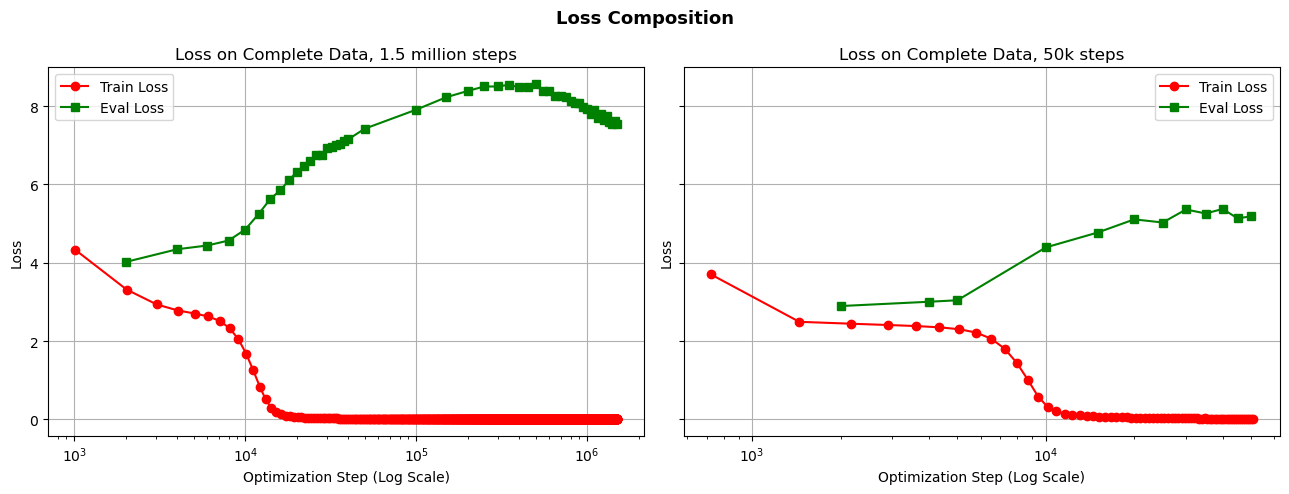

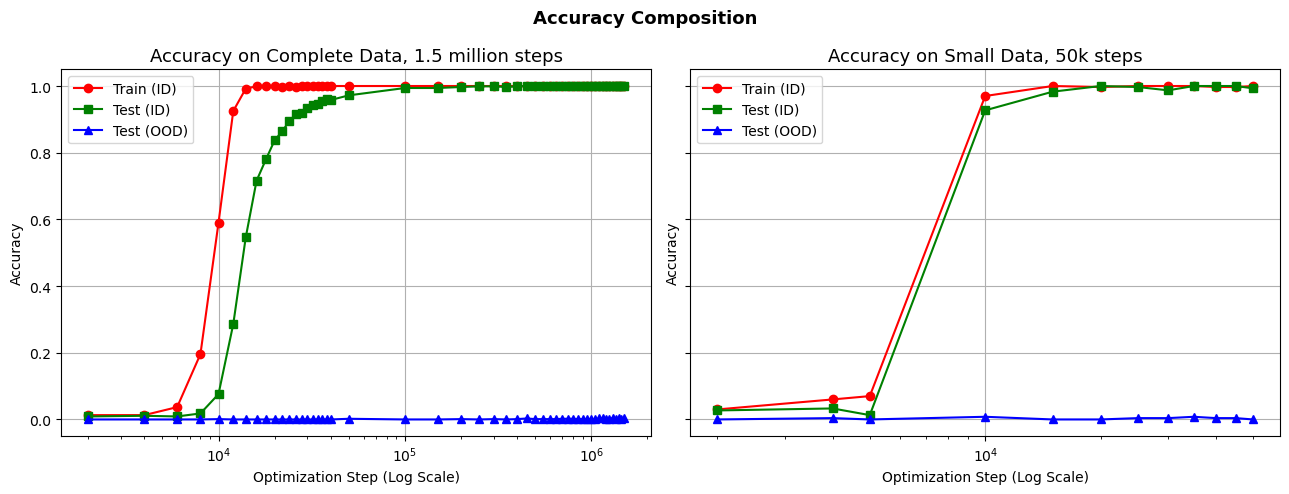

In [37]:
Loss_graph_1(title_1 = 'Loss on Complete Data, 1.5 million steps'  , title_2 = "Loss on Complete Data, 50k steps")
Acc_graph(title_1 = 'Accuracy on Complete Data, 1.5 million steps'  , title_2 = "Accuracy on Small Data, 50k steps")

# ***PROBLEMS TO REFLECT ON***

* 1)*Loss of -1 what does it mean exactly?*

It is just how it is defined. When creating the dataframe for consitency it puts -1 as placeholder


 * 2)**Other strange thing is that the eval loss seem to grow**!!! 
 
 This is explained as in the implementation the **eval_loss** is calculated on the  *valid.json* file that is **constructed only with OOD_inferred facts**. This choice was done to nudge the model towards OOD_inferred generalization and try to lower the ID_inferred overfitting. However, as long as the model is not able to learn OOD at all this is not really able to nudge towards OOD generalization. Due to grokking and achiving 100% accuracy on ID_inferred this choice did not really bring to many differences that using (ID_inferred or a mix of ID and OOD in the validation).

# test  
** 2nd figure is just to s***

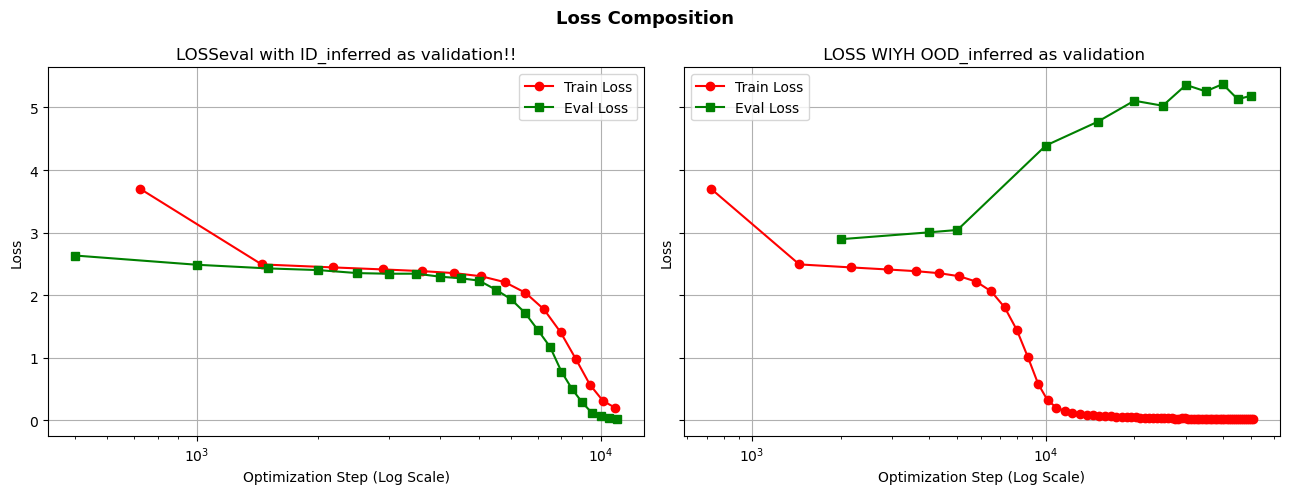

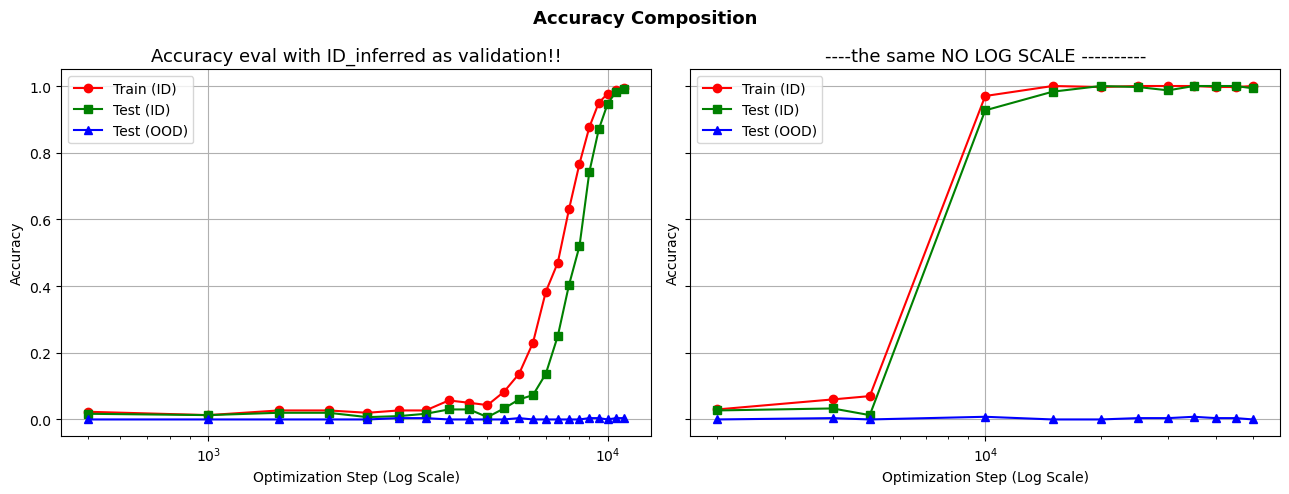

In [38]:
Loss_graph_1(data_es,data_es_2,  title_1 = 'LOSSeval with ID_inferred as validation!!'  , title_2 = " LOSS WIYH OOD_inferred as validation", compare_scale=False)

Acc_graph(scores_dict_normal_test , scores_dict_normal_test_1, title_1 = 'Accuracy eval with ID_inferred as validation!!'  , title_2 = "----the same NO LOG SCALE ----------",compare_scale=False)

## Parameter sharing

### Real parameter sharing (provided code)

### Test on incorporating few examples of OOD in inference training
(obv then this are not more OOD however we want to see if with just providing few examples then the model will accept this OOD as ID and work for generalization)

In [ ]:
path_es_SH = "/scratch/davide/model_paper/outputs_OOD_MODIFIED_composition_SMALL.200.20.18.0/" #in this case in the train was give

#"/scratch/davide/model_paper/outputs_small_4gpu_knowledgsharing/"  #here we have 4 layers and knowledsharing
path_es_1_SH= "/scratch/davide/model_paper/outputs_small_4gpu_knowledgsharing_750k/"



path_es_csv = path_es_SH+"training_progress_scores.csv"
path_es_csv_1 = path_es_1_SH +"training_progress_scores.csv"
data_es_SH= pd.read_csv(path_es_csv)
data_es_1_SH= pd.read_csv(path_es_csv_1)

In [ ]:
sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_es_SH, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only

#this is used to run the script from command line
parser = argparse.ArgumentParser()
parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
parser.add_argument("--fn", default='all_items.json', type=str, help="")
parser.add_argument("--partition_atomic", action="store_true", help="")
args = parser.parse_args()
args.dir, args.fn, args.partition_atomic

scores_dict_normal_test_SH = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

temp = []
# temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
for (folder_name, val) in scores_dict_normal_test_SH:
    temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

for (folder_name, res) in temp:
    #print(folder_name, "|", res)
    continue


#############################second 
def( dir, check = False, fn = 'all_items.json',file_name = 'Accuracy_Loss.ipynb')

    #sys.argv = ['Accuracy_Loss.ipynb', '--dir', path_es_1_SH, '--fn', 'all_items.json'] # (sys.argv this line is to use it in notebook only
    sys.argv = [file_name , '--dir', dir, '--fn', fn]

    #this is used to run the script from command line
    parser = argparse.ArgumentParser()
    parser.add_argument("--dir", default=None, type=str, required=True, help="Input file dir.")
    parser.add_argument("--fn", default='all_items.json', type=str, help="")
    parser.add_argument("--partition_atomic", action="store_true", help="")
    args = parser.parse_args()
    args.dir, args.fn, args.partition_atomic

    scores_dict = eval_file(args.dir, args.fn, args.partition_atomic) # list of tuple (folder_name, res) = (checkpoint, "sringa di risultati"))

    if check:
        temp = []
        # temp = lista di tuple (folder_name, res) = (checkpoint, "sringa di risultati"))
        for (folder_name, val) in scores_dict_normal_test_1_SH:
            temp.append((folder_name, "; ".join(["{}: {}".format(t, res) for (t, res) in val])))

        for (folder_name, res) in temp:
            print(folder_name, "|", res)
            continue
    return scores_dict



100%|██████████| 153/153 [00:00<00:00, 329.09it/s]


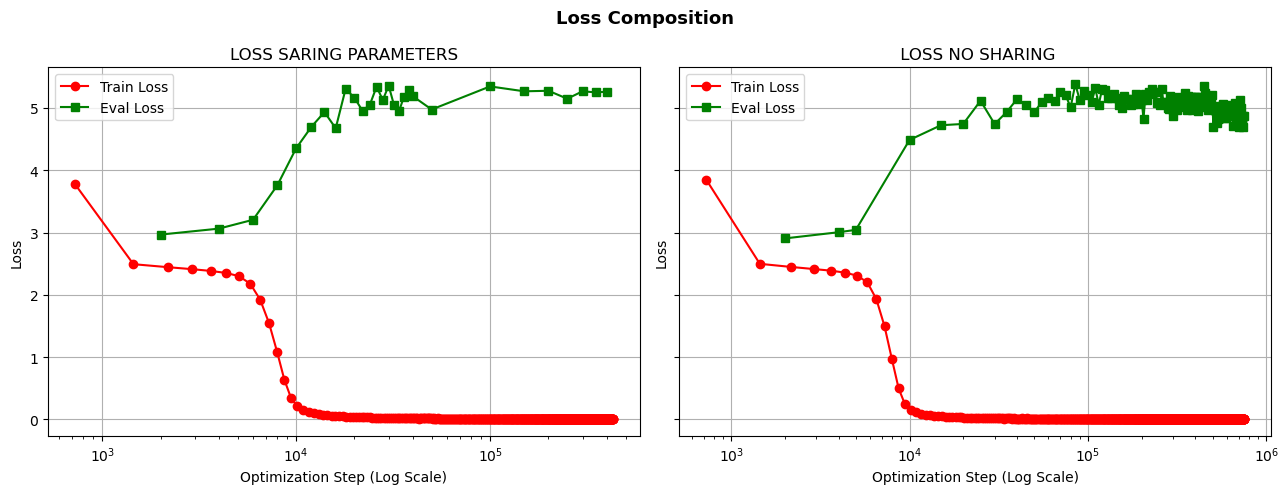

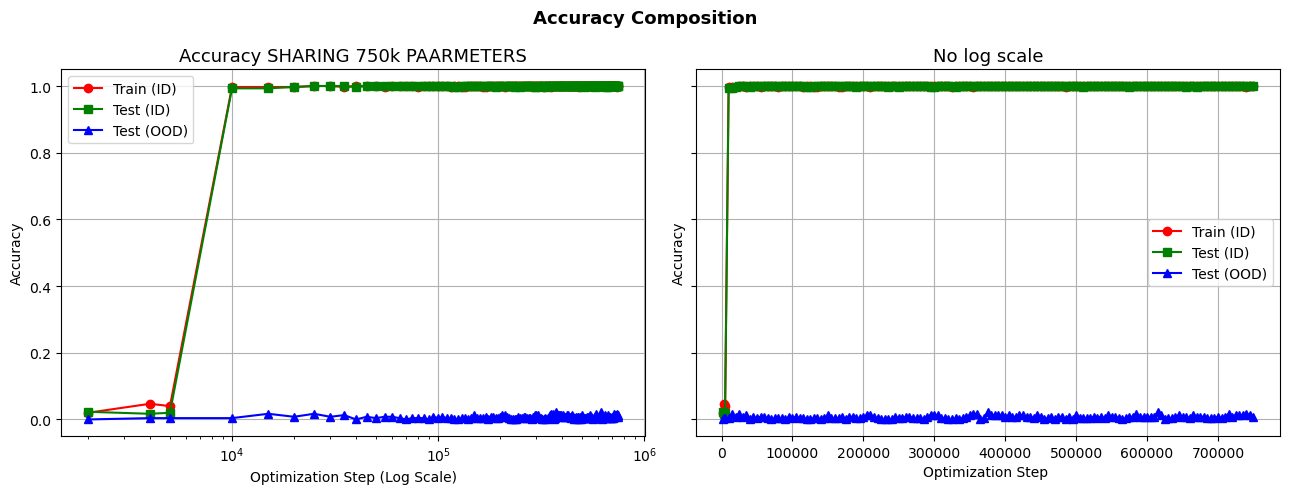

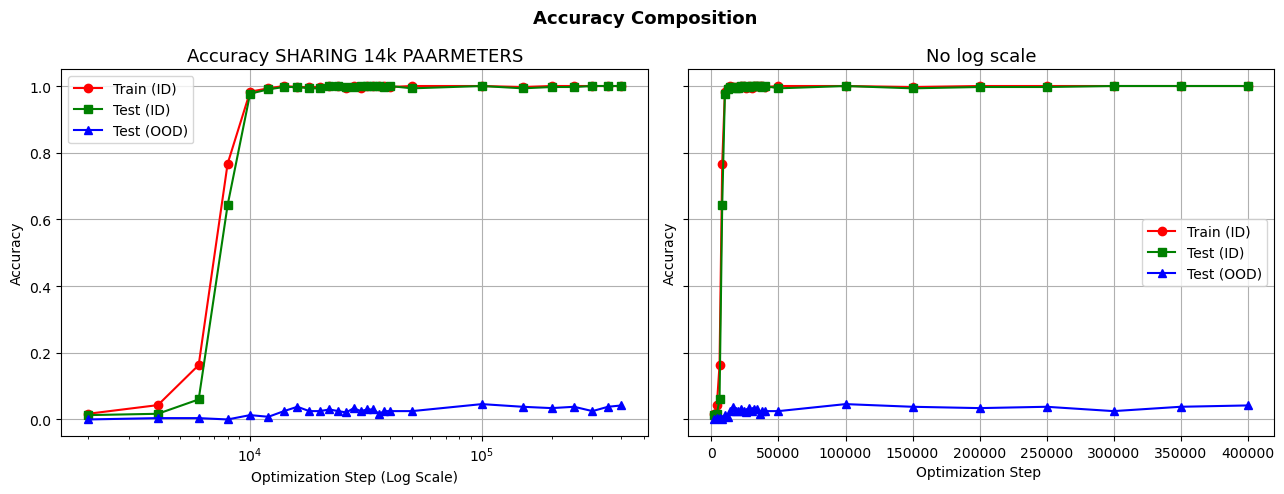

In [41]:
Loss_graph_1(data_es_SH,data_es_1_SH,  title_1 = 'LOSS SARING PARAMETERS'  , title_2 = " LOSS NO SHARING", compare_scale=False)

Acc_graph(scores_dict_normal_test_1_SH , scores_dict_normal_test_1_SH, title_1 = 'Accuracy SHARING 750k PAARMETERS'  , title_2 = "No log scale",compare_scale=True)
Acc_graph(scores_dict_normal_test_SH ,scores_dict_normal_test_SH, title_1 = 'Accuracy SHARING 14k PAARMETERS'  , title_2 = "No log scale",compare_scale=True)

Why in the second figure we have a decresing eval_loss? (maybe just bc  is such a small part showed- few steps?) is using a small dataset also. Why the eval  loss is so small at the beginning compared to other datasets? 

In [22]:
test_data= "/home/s220331/GROK/Thesis/data/composition.2000.200.12.6"


output_json= "valid_iid.json"
import json
import csv

# Load the JSON file
with open(test_data +"/test.json", 'r') as json_file:
    data_test = json.load(json_file)

# Filter the dictionaries where 'type' is 'train_inferred'
filtered_data = [item for item in data_test if item['type'] == 'train_inferred']
#filtered_data

# Save the filtered data to a new JSON file
with open(test_data + '/valid_iid.json', 'w') as output_file:
    json.dump(filtered_data, output_file, indent=4)

print("Filtered data has been saved to output.json")

Filtered data has been saved to output.json


In [23]:
    # my validation with the test_inferred_iid    
with open("data/{}/valid_iid.json".format(dataset_name), "w", encoding='utf-8') as f:
    json.dump(test_inferred_iid, f)

IndentationError: expected an indented block after 'with' statement on line 2 (1973605674.py, line 3)